# Liver Disease Prediction

In [ ]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# loading data
df = pd.read_csv('liver.csv', encoding='latin-1') # Try reading with Latin-1 encoding
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
df.shape

(30691, 11)

In [ ]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [ ]:
df.dtypes[df.dtypes=='object']

,0
Gender of the patient,object


## Distribution of Numerical Features

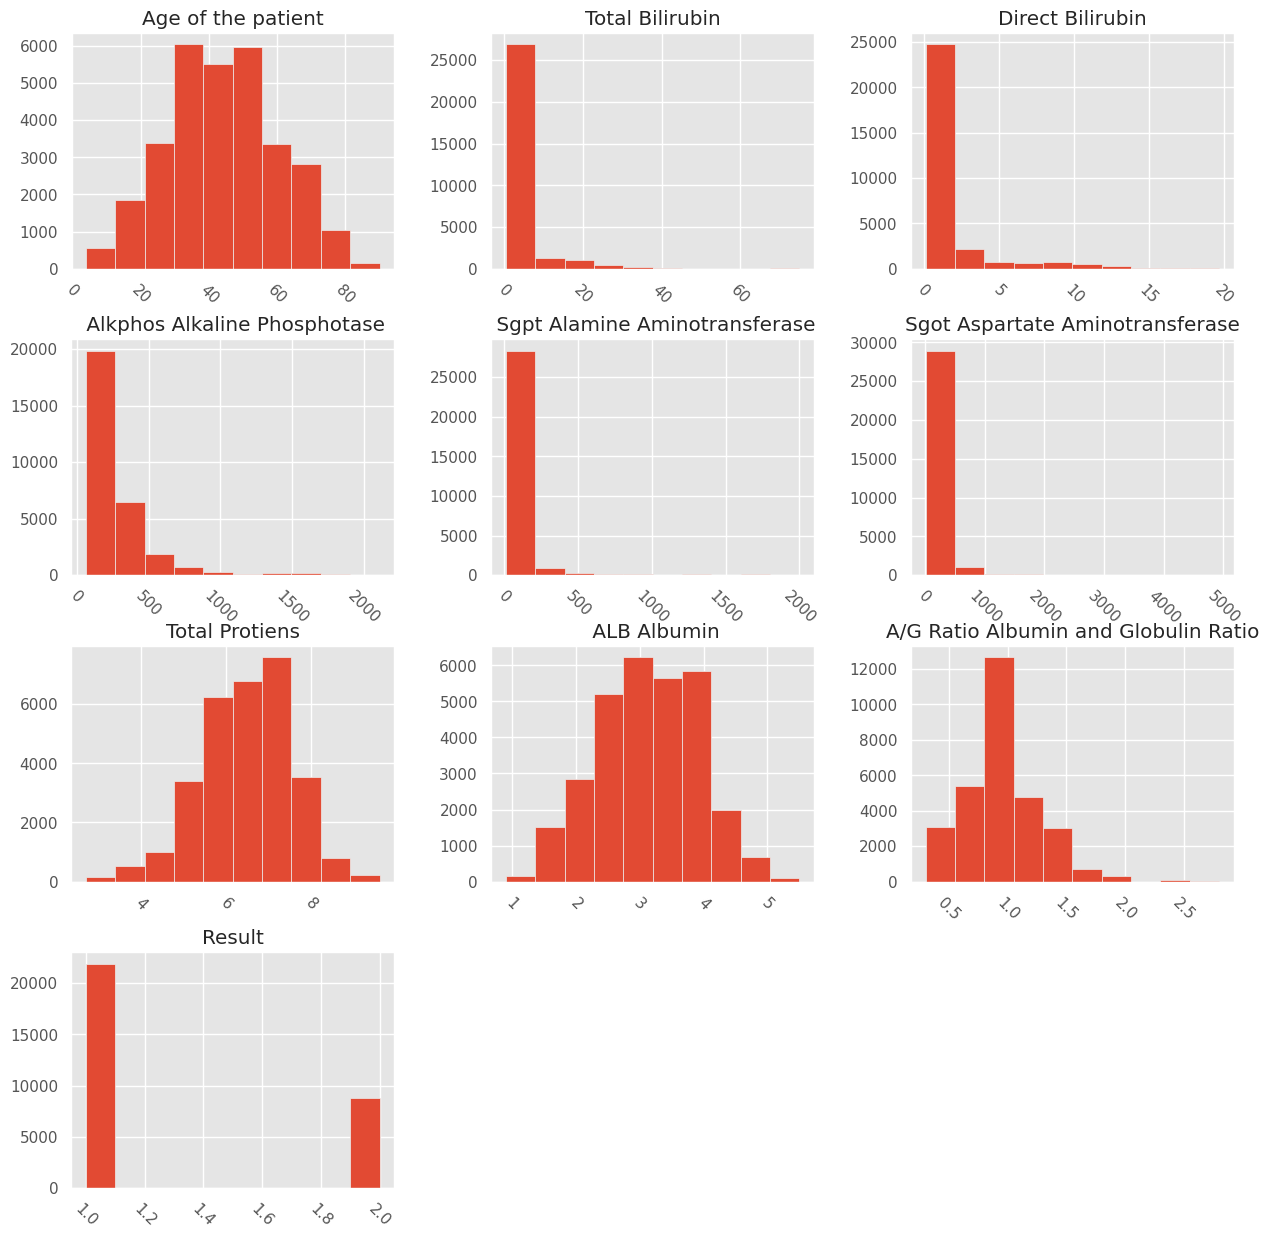

In [ ]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [ ]:
def partition(x):
    if x == 2:
        return 0
    return 1

# Check for the correct column name
print(df.columns)

# Replace 'Result' with the actual name of the column you want to modify if needed
df['Result'] = df['Result'].map(partition)


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


## Distribution of categorical data

In [ ]:
df.describe(include=['object'])

,Gender of the patient
count,29789
unique,2
top,Male
freq,21986


## Bar plots for categorical Features

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


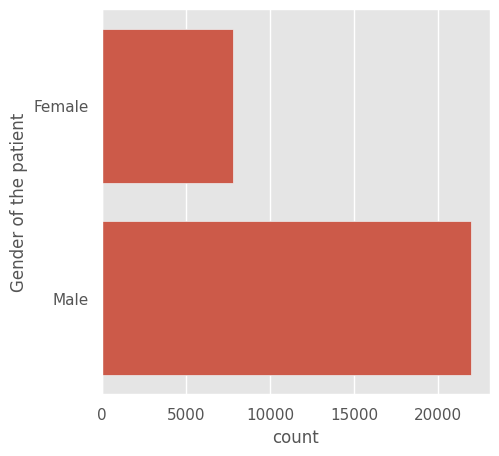

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Print the cleaned columns of your DataFrame
print(df.columns)

plt.figure(figsize=(5,5))
sns.countplot(y='Gender of the patient', data=df)
plt.show()


In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

# Display the first few rows for males, adjusting the column names
df[df['Gender of the patient'] == 'Male'][['Age of the patient', 'Gender of the patient', 'Total Bilirubin']].head()

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


,Age of the patient,Gender of the patient,Total Bilirubin
1,62.0,Male,10.9
2,62.0,Male,7.3
3,58.0,Male,1.0
4,72.0,Male,3.9
5,46.0,Male,1.8


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


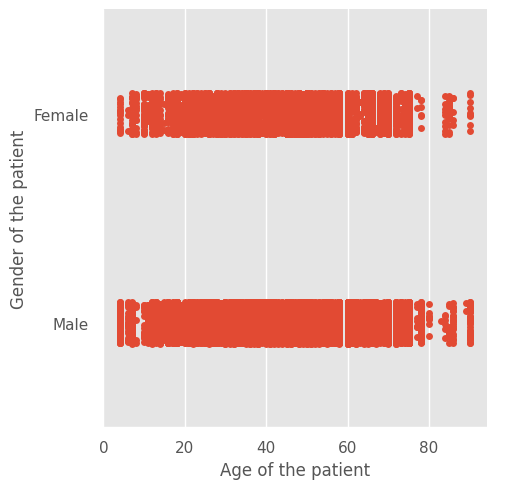

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Use catplot instead of factorplot
sns.catplot(x="Age of the patient", y="Gender of the patient", data=df)
plt.show()

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  21986
Number of patients that are female:  7803


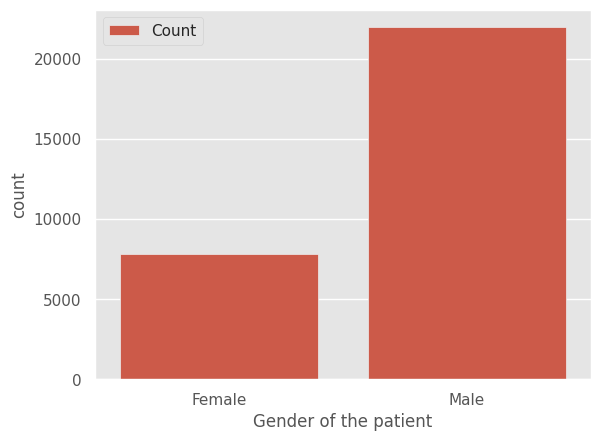

In [ ]:
sns.countplot(data=df, x = 'Gender of the patient', label='Count')

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [ ]:
## if score==negative, mark 0 ;else 1
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender of the patient'] = df['Gender of the patient'].map(partition)

#### 2-D Scatter Plot

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


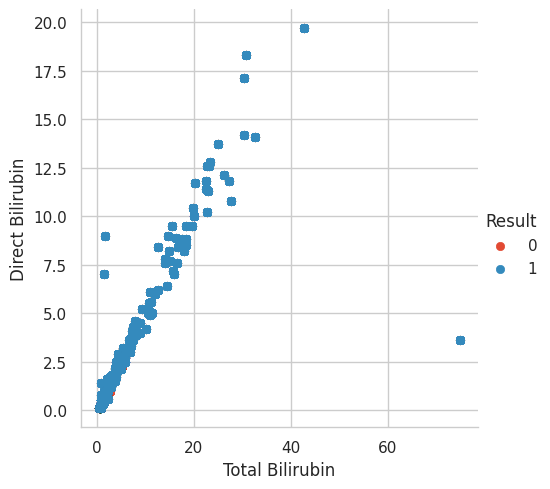

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # Background Grid

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Use FacetGrid with an appropriate column for hue
sns.FacetGrid(df, hue='Result', height=5).map(plt.scatter, 'Total Bilirubin', 'Direct Bilirubin').add_legend()
plt.show()


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


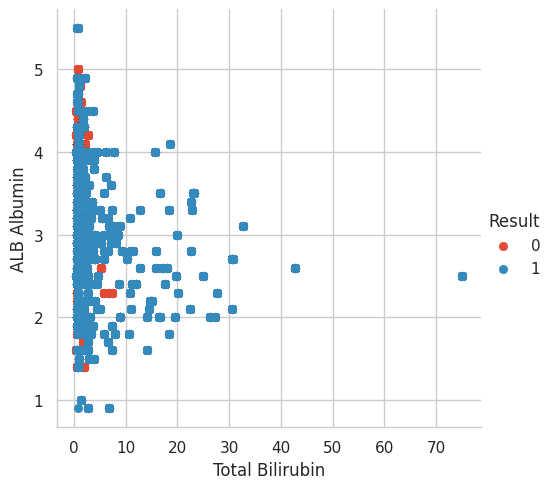

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # Background Grid

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Use FacetGrid with an appropriate column for hue
sns.FacetGrid(df, hue='Result', height=5).map(plt.scatter, 'Total Bilirubin', 'ALB Albumin').add_legend()
plt.show()

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


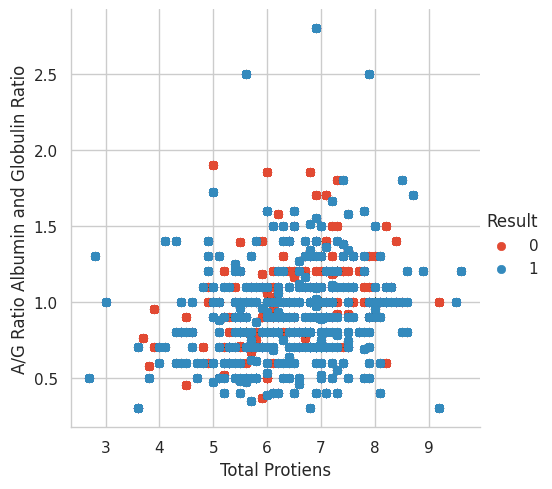

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # Background Grid

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Use FacetGrid with an appropriate column for hue and correct column names
sns.FacetGrid(df, hue='Result', height=5).map(plt.scatter, 'Total Protiens', 'A/G Ratio Albumin and Globulin Ratio').add_legend()
plt.show()


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [ ]:
df.corr()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
Age of the patient,1.000000,-0.033836,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.018056,0.004759
Gender of the patient,-0.033836,1.000000,-0.013470,-0.010978,-0.009340,-0.002105,0.003812,-0.005610,-0.001115,0.002300,-0.006623
Total Bilirubin,-0.001600,-0.013470,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197978,0.225061
Direct Bilirubin,-0.001521,-0.010978,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.189414,0.249538
Alkphos Alkaline Phosphotase,-0.000761,-0.009340,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.228583,0.183356
Sgpt Alamine Aminotransferase,0.000659,-0.002105,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002433,0.165914
Sgot Aspartate Aminotransferase,0.006104,0.003812,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066912,0.158660
Total Protiens,-0.007951,-0.005610,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.226314,-0.030370
ALB Albumin,-0.015164,-0.001115,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.682759,-0.160346
A/G Ratio Albumin and Globulin Ratio,-0.018056,0.002300,-0.197978,-0.189414,-0.228583,-0.002433,-0.066912,0.226314,0.682759,1.000000,-0.158350


<Axes: >

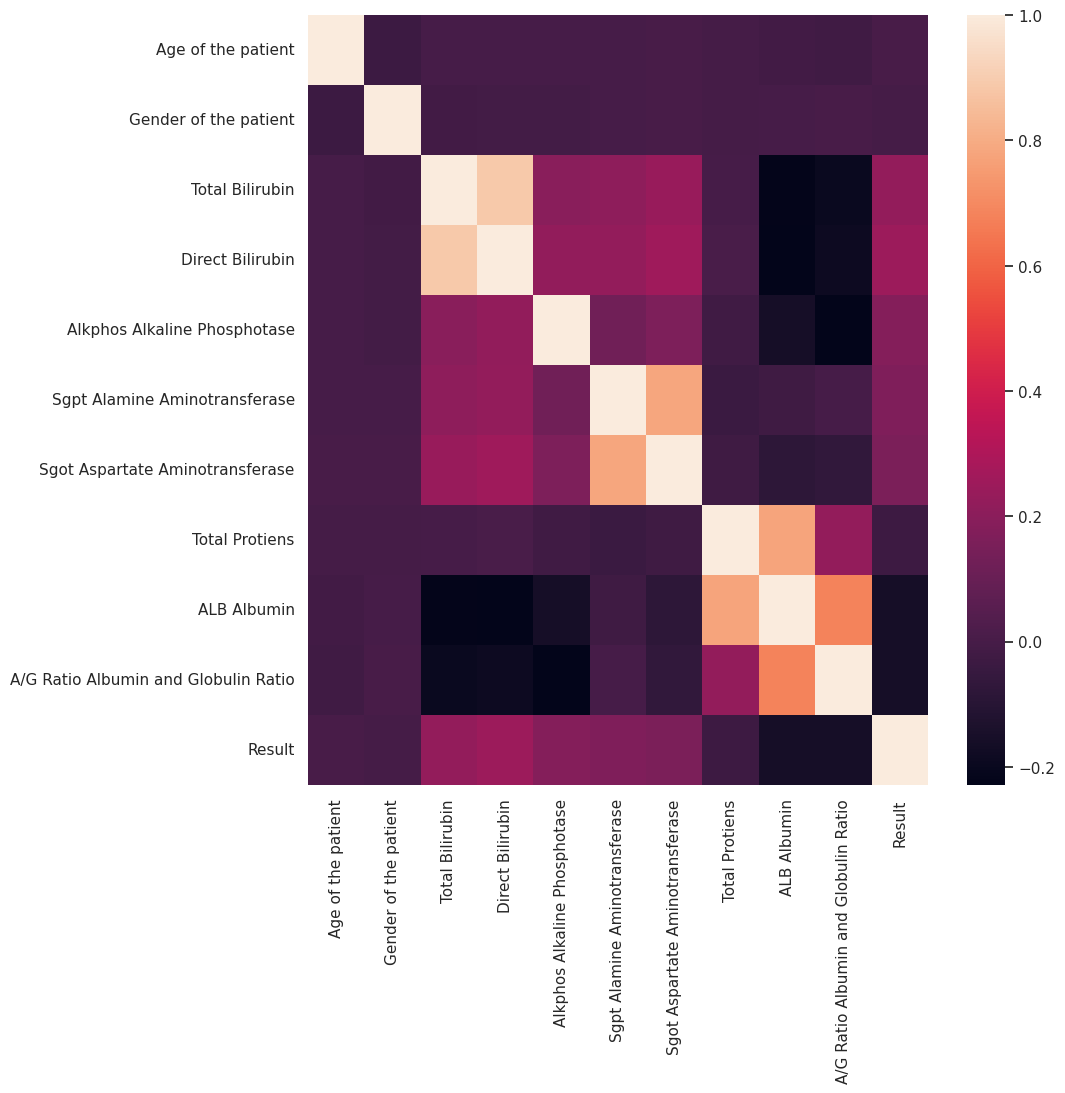

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

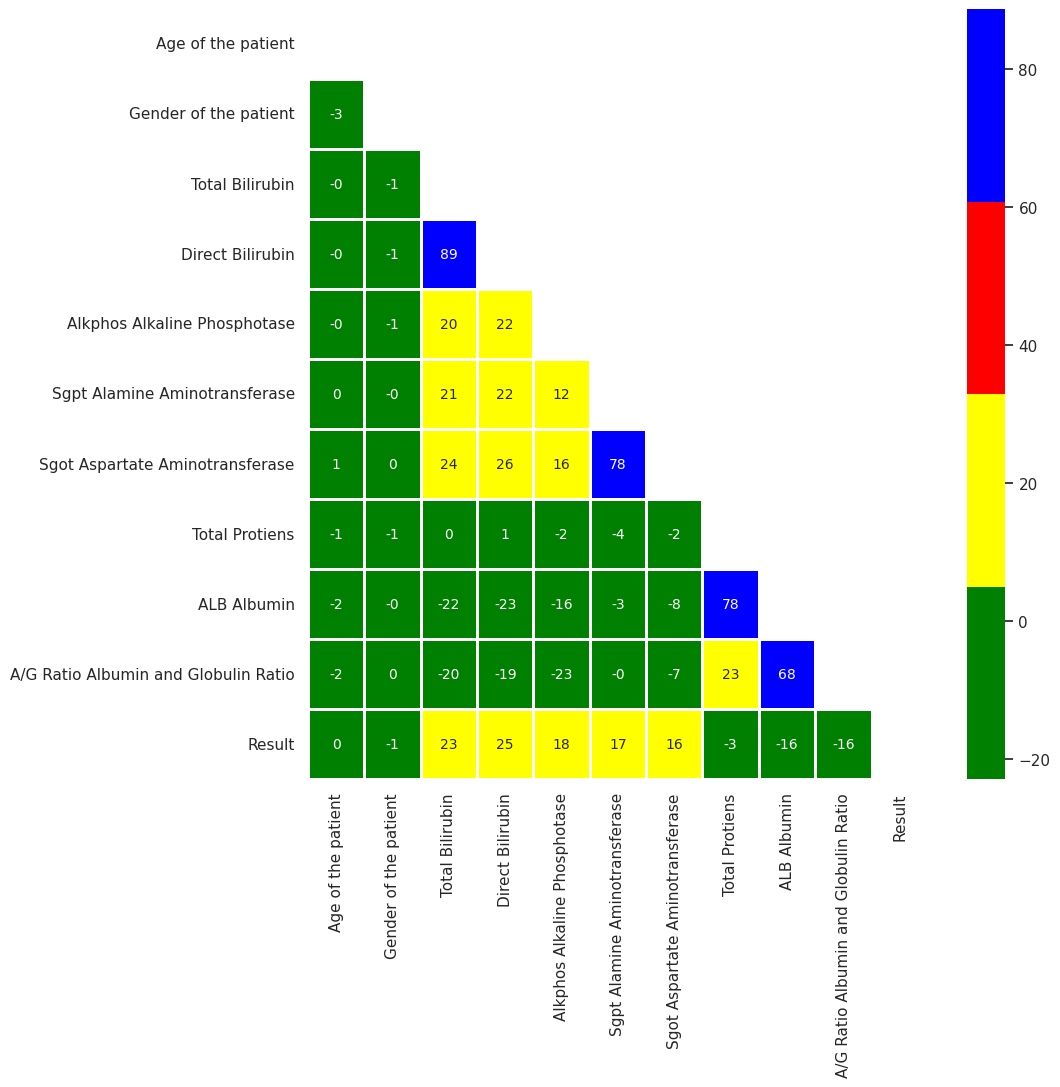

In [ ]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [ ]:
df = df.drop_duplicates()
print( df.shape )

(19231, 11)


There were 13 duplicates

## Removing Outliers

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


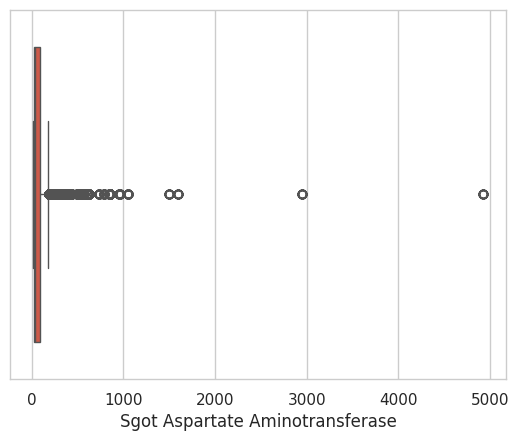

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Create a box plot for the correct column
sns.boxplot(x=df['Sgot Aspartate Aminotransferase'])
plt.show()

In [ ]:
# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Sort values in the correct column and display the top 5
df['Sgot Aspartate Aminotransferase'].sort_values(ascending=False).head()


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


,Sgot Aspartate Aminotransferase
21155,4929.0
12156,4929.0
25812,4929.0
135,4929.0
22904,4929.0


In [ ]:
# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Filter the DataFrame using the correct column name
df = df[df['Sgot Aspartate Aminotransferase'] <= 3000]

# Display the shape of the filtered DataFrame
df.shape

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


(18811, 11)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


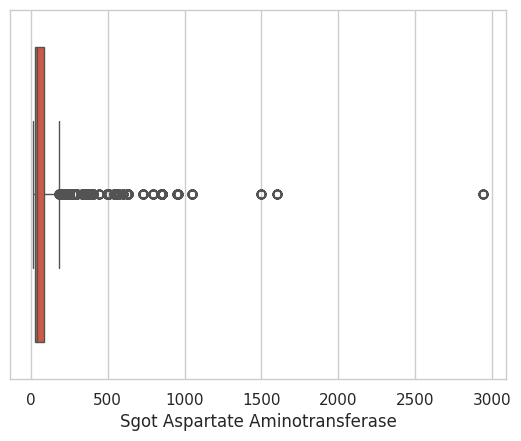

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Create a box plot for the correct column
sns.boxplot(x=df['Sgot Aspartate Aminotransferase'])
plt.show()

In [ ]:
# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Sort values in the correct column and display the top 5
df['Sgot Aspartate Aminotransferase'].sort_values(ascending=False).head()


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


,Sgot Aspartate Aminotransferase
23105,2946.0
22303,2946.0
700,2946.0
3032,2946.0
4781,2946.0


In [ ]:
# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Filter the DataFrame using the correct column name
df = df[df['Sgot Aspartate Aminotransferase'] <= 2500]

# Display the shape of the filtered DataFrame
df.shape

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


(18780, 11)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df=df.dropna(how='any')

In [ ]:
df.shape

(16646, 11)

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [ ]:
# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names in your DataFrame
print(df.columns)

# Replace 'Dataset' with the correct column name for the target variable
y = df['Result']  # Example: if 'Result' is your target variable

# Create separate object for input features, excluding the target variable
X = df.drop('Result', axis=1)  # Replace 'Result' with the correct target variable column name

# Display the shapes of X and y to confirm
print(X.shape)
print(y.shape)


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')
(16646, 10)
(16646,)


In [ ]:
from sklearn.model_selection import train_test_split

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Create separate object for target variable
y = df['Result']  # Replace 'Result' with the correct target variable column name

# Create separate object for input features, excluding the target variable
X = df.drop('Result', axis=1)  # Replace 'Result' with the correct target variable column name

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

# Display the shapes of the resulting splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11652, 10)
(4994, 10)
(11652,)
(4994,)


In [ ]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11652, 10) (4994, 10) (11652,) (4994,)


### Data standardization

In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Check for mean and std dev.
X_train.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04
mean,5.488229e-17,-1.170822e-16,6.585875e-17,-3.811270e-18,6.646855e-17,-7.927442e-18,-6.707836e-18,-3.878349e-16,7.177384e-16,-1.341567e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.411910e+00,-6.854726e-01,-4.735625e-01,-4.908227e-01,-9.407511e-01,-4.195868e-01,-5.147102e-01,-3.441080e+00,-2.797885e+00,-1.984515e+00
25%,-7.154050e-01,-6.854726e-01,-4.093844e-01,-4.565254e-01,-4.741450e-01,-3.349314e-01,-4.218240e-01,-6.172441e-01,-6.667021e-01,-7.569735e-01
50%,7.225809e-02,-6.854726e-01,-3.772954e-01,-4.222282e-01,-3.324967e-01,-2.502760e-01,-3.289379e-01,1.114878e-01,-3.988356e-02,-8.182558e-02
75%,6.781528e-01,1.458722e+00,-1.205831e-01,-7.925572e-02,3.828853e-02,-8.747713e-02,-6.769560e-02,6.580367e-01,8.376624e-01,4.705682e-01
max,2.798784e+00,1.458722e+00,1.149565e+01,6.231438e+00,7.587309e+00,1.253920e+01,8.715850e+00,2.844233e+00,2.968845e+00,5.687621e+00


In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,-0.010412,-0.023838,-0.009409,-0.017055,0.009849,0.018816,0.015240,0.028677,0.024656,0.004494
std,1.005398,0.990510,0.987131,0.967899,0.987687,1.064115,1.056656,0.982466,0.984070,0.966775
min,-2.411910,-0.685473,-0.473563,-0.490823,-0.940751,-0.419587,-0.514710,-3.441080,-2.797885,-1.984515
25%,-0.715405,-0.685473,-0.409384,-0.456525,-0.474145,-0.334931,-0.427629,-0.617244,-0.666702,-0.756974
50%,0.072258,-0.685473,-0.377295,-0.422228,-0.336663,-0.256788,-0.328938,0.111488,-0.039884,0.040929
75%,0.678153,1.458722,-0.120583,-0.079256,0.038289,-0.087477,-0.061890,0.658037,0.837662,0.470568
max,2.798784,1.458722,11.495648,6.231438,7.587309,10.455376,8.715850,2.844233,2.968845,5.687621


# LR

In [ ]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# model predictions

y_pred = lr.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7231376587710264
0.7256708049659591


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 241 1182]
 [ 188 3383]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.17      0.26      1423
           1       0.74      0.95      0.83      3571

    accuracy                           0.73      4994
   macro avg       0.65      0.56      0.55      4994
weighted avg       0.69      0.73      0.67      4994



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions

y_pred = knn.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9267078613113628
0.856427713255907


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[1046  377]
 [ 340 3231]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1423
           1       0.90      0.90      0.90      3571

    accuracy                           0.86      4994
   macro avg       0.83      0.82      0.82      4994
weighted avg       0.86      0.86      0.86      4994



# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
# best parameters

grid_search.best_params_

{'C': 20, 'gamma': 0.1}

In [ ]:
# best score

grid_search.best_score_

0.7860458128269288

In [ ]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [ ]:
# model predictions

y_pred = svc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.7150703741846893
0.7150580696836203


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[   0 1423]
 [   0 3571]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1423
           1       0.72      1.00      0.83      3571

    accuracy                           0.72      4994
   macro avg       0.36      0.50      0.42      4994
weighted avg       0.51      0.72      0.60      4994



# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9999141778235496
Test Accuracy of Decision Tree Classifier is 0.999799759711654 

Confusion Matrix :- 
[[1422    1]
 [   0 3571]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00      3571

    accuracy                           1.00      4994
   macro avg       1.00      1.00      1.00      4994
weighted avg       1.00      1.00      1.00      4994



In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'best'}
0.8976029867209707


In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9442155853072434
Test Accuracy of Decision Tree Classifier is 0.9423307969563476 

Confusion Matrix :- 
[[1222  201]
 [  87 3484]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1423
           1       0.95      0.98      0.96      3571

    accuracy                           0.94      4994
   macro avg       0.94      0.92      0.93      4994
weighted avg       0.94      0.94      0.94      4994



# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Change 'auto' to a valid option, such as 'sqrt'
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'sqrt',
                                   min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9998283556470993
0.999799759711654


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[1422    1]
 [   0 3571]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00      3571

    accuracy                           1.00      4994
   macro avg       1.00      1.00      1.00      4994
weighted avg       1.00      1.00      1.00      4994



# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
# best parameters

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [ ]:
# best score

grid_search_gbc.best_score_

0.9996566521075371

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.88259526261586
0.8792551061273528


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 882  541]
 [  62 3509]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1423
           1       0.87      0.98      0.92      3571

    accuracy                           0.88      4994
   macro avg       0.90      0.80      0.83      4994
weighted avg       0.89      0.88      0.87      4994



# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9997425334706488
0.9995995194233079


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[1422    1]
 [   1 3570]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00      3571

    accuracy                           1.00      4994
   macro avg       1.00      1.00      1.00      4994
weighted avg       1.00      1.00      1.00      4994



# Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,99.98
6,XgBoost,99.96
3,Decision Tree Classifier,94.23
5,Gradient Boosting Classifier,87.93
1,KNN,85.64
0,Logistic Regression,72.57
2,SVM,71.51


In [ ]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs("models", exist_ok=True)

model = svc
pickle.dump(model, open("models/liver.pkl",'wb')) # Now this should work

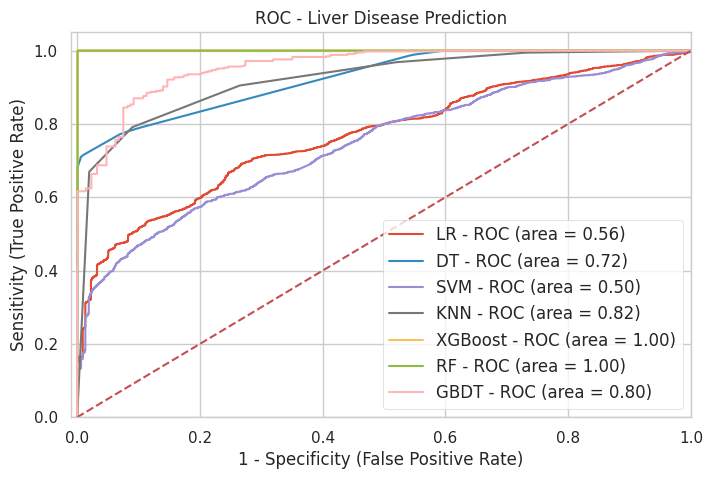

In [ ]:
import os
from sklearn import metrics
import matplotlib.pyplot as plt

# ... (Your existing code for model definitions and data preparation)

plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Create the 'outputs' directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Now save the figure
plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[72.57000000000001, 94.23, 71.50999999999999, 85.64, 99.96000000000001, 99.98, 87.92999999999999]
[55.84, 87.6, 50.0, 81.99, 99.95, 99.96000000000001, 80.12]


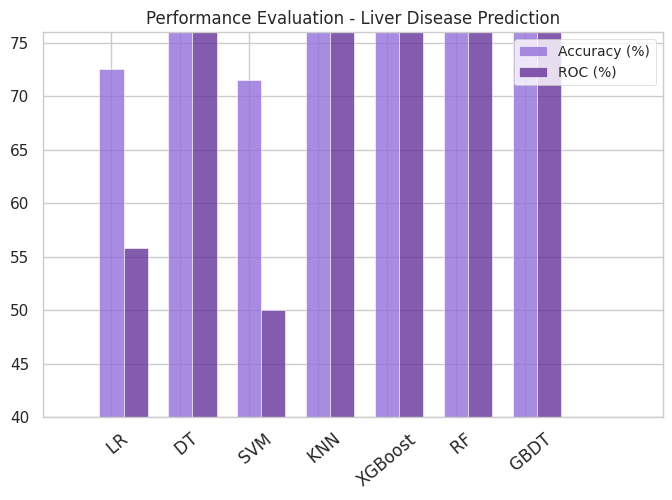

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

Saving the trained model

In [ ]:
filename = 'liver_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('liver_model.sav', 'rb'))